# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [1]:
# Import
import pickle
import os.path
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
name, path = 'MotivoNathan', '../distances/20161029_162520/'
#name, path = 'SHR', '../distances/20161029_165116/'

## Distance distribution

Distribution of topological distances

Create histograms

In [3]:
if os.path.isfile(path+'hist_Dtop') and os.path.isfile(path+'hist_Ddyn') and os.path.isfile(path+'hist_DvsD'):
    with open(path+'hist_Dtop', 'rb') as f: hist_Dtop = pickle.load(f)
    with open(path+'hist_Ddyn', 'rb') as f: hist_Ddyn = pickle.load(f)
    with open(path+'hist_DvsD', 'rb') as f: hist_DvsD = pickle.load(f)

else:
    hist_Dtop = {}
    hist_Ddyn = {}
    hist_DvsD = {}

    with open(path+"crossdistances.out") as f:
        for line in f:
            line = line.strip().split(',')
            line = [int(l) for l in line]
            if line[2] in hist_Dtop: hist_Dtop[line[2]] += 1
            else: hist_Dtop[line[2]] = 1
            if line[3] in hist_Ddyn: hist_Ddyn[line[3]] += 1
            else: hist_Ddyn[line[3]] = 1
            if (line[2], line[3]) in hist_DvsD: hist_DvsD[(line[2], line[3])] += 1
            else: hist_DvsD[(line[2], line[3])] = 1

    sorted(hist_Dtop, key=lambda key:hist_Dtop[key])
    sorted(hist_Ddyn, key=lambda key:hist_Ddyn[key])
    sorted(hist_DvsD, key=lambda key:hist_DvsD[key])

    with open('../distances/20161029_162520/hist_Dtop', 'wb') as f: pickle.dump(hist_Dtop, f)
    with open('../distances/20161029_162520/hist_Ddyn', 'wb') as f: pickle.dump(hist_Ddyn, f)
    with open('../distances/20161029_162520/hist_DvsD', 'wb') as f: pickle.dump(hist_DvsD, f)

In [4]:
n, mean = 0, 0
for key, value in hist_Ddyn.items():
    mean += key*value
    n += value
mean/n

9

Pearson correlation coefficient

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.

In [5]:
from scipy.stats.stats import pearsonr   
x = [d[0] for d in hist_DvsD.keys()]
y = [d[1] for d in hist_DvsD.keys()]
pearsonr(x,y)

(0.4006943836916268, 9.6576375398001182e-08)

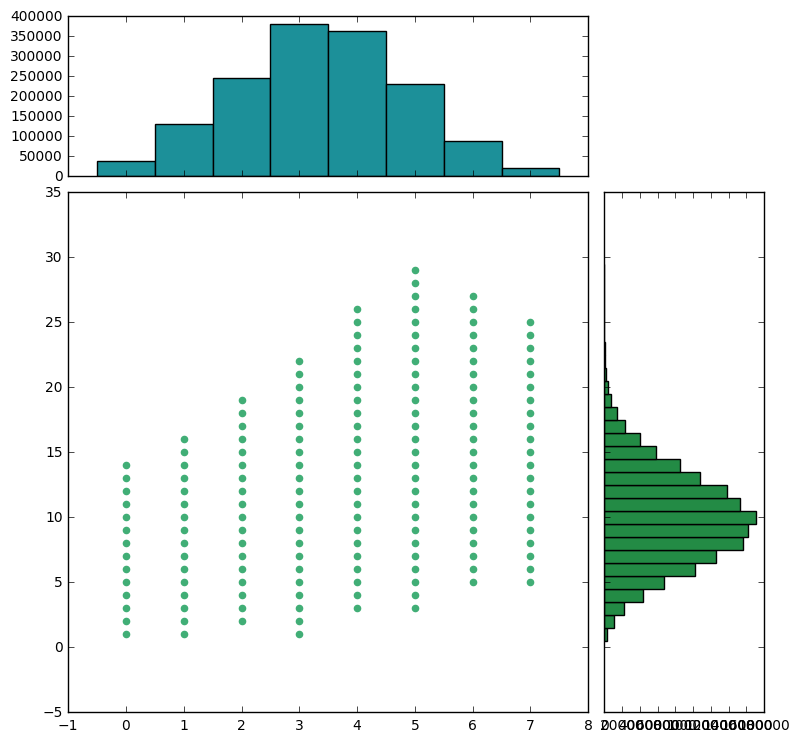

In [6]:
from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
x = [d[0] for d in hist_DvsD.keys()]
y = [d[1] for d in hist_DvsD.keys()]
axScatter.scatter(x, y, color='#41ae76')

# now determine nice limits by hand:
xwidth = 1.0
ywidth = 1.0
xkeys = [x-xwidth/2 for x in list(hist_Dtop.keys())]
ykeys = [y-ywidth/2 for y in list(hist_Ddyn.keys())]
axHistx.bar(xkeys, list(hist_Dtop.values()), width=xwidth, color='#1c9099')
axHisty.barh(ykeys, list(hist_Ddyn.values()), height=ywidth, color='#238b45')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

#plt.savefig('2PLN_DtopVsDdyn.svg')
plt.show()

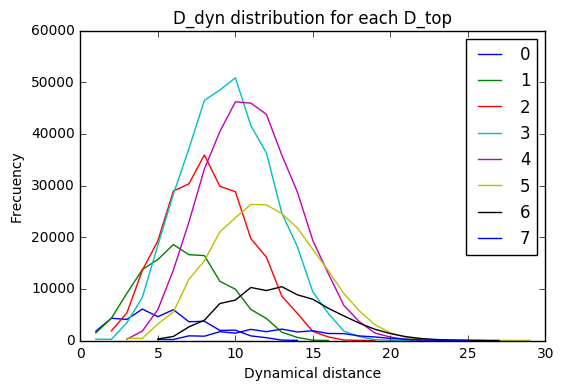

In [7]:
for i in range(8): 
    Ddist = []
    for d, c in hist_DvsD.items():
        if d[0] == i: Ddist.append( [d[1],c] )
    Ddist = sorted(Ddist,key=lambda x: x[0])
    plt.plot([d[0] for d in Ddist], [d[1] for d in Ddist], label=str(i))

plt.title("D_dyn distribution for each D_top")
plt.xlabel("Dynamical distance")
plt.ylabel("Frecuency")
plt.legend()
plt.show()

## Funtional Loops

Distribution of fun_loops by motif


Count loops and obtain distribution

In [8]:
dic_Functionalities = {}
with open(path+"Combinations_Functionality.dat") as f:
    for line in f:
        if 'NONE' in line: 
            line = line.replace('NONE','0')
        line = line.strip().split(',')
        dic_Functionalities[ int(line[0]) ] = 'F'+line[1]
#dic_Functionalities

In [9]:
from collections import Counter
# count how many time each functionality occurs
f_counts = Counter(dic_Functionalities.values())
#count frequency of counts
f_freq = Counter(f_counts.values())
f_freq

Counter({1: 915, 2: 339, 3: 21, 4: 15, 5: 1, 6: 2})

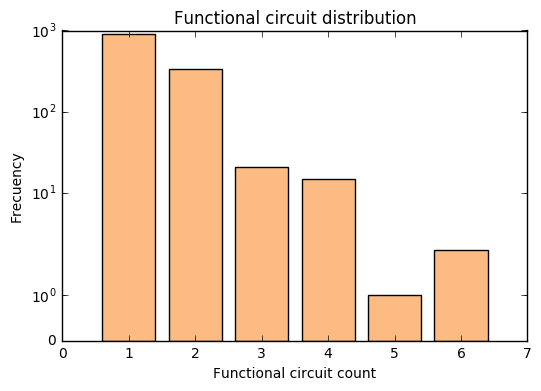

In [10]:
plt.bar(f_freq.keys(), f_freq.values(), align="center", color='#fdbb84')
plt.yscale('symlog')
plt.title("Functional circuit distribution")
plt.xlabel("Functional circuit count")
plt.ylabel("Frecuency")
plt.show()

## Network

Create network

In [19]:
#first, create network

if os.path.isfile(path+'network'):
    G = nx.read_gpickle(path+'network')

else:
    G = nx.Graph()
    with open(path+"crossdistances.out") as f:
        for line in f:
            if '1000000' in line: line=line.replace('1000000','')
            line = line.strip().split(',')
            line = [int(l) for l in line]
            G.add_edge(line[0],line[1], w_top=line[2], w_dyn=line[3])
    #G.edges(data=True)
    
    with open(path+"Combinations_Functionality.dat") as f:
        for line in f:
            if 'NONE' in line: 
                line = line.replace('NONE','0')
            line = line.strip().split(',')
            G.node[ int(line[0]) ]['func'] = 'F'+line[1]
    G.nodes(data=True)
    
    nx.write_gpickle(G, path+'network')

D_top = 0 network

In [20]:
G0 = G.copy()
# remove edgens with d_top > 0
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']!=0]
G0.remove_edges_from(del_edges)
# remove unconnected nodes
deg = G0.degree()
del_nodes = [n for n in deg if deg[n] == 0]
G0.remove_nodes_from(del_nodes)

#G0.edges(data=True)
#G0.nodes(data=True)

[(0, 2, {'w_dyn': 4, 'w_top': 0}),
 (0, 3, {'w_dyn': 2, 'w_top': 0}),
 (2, 3, {'w_dyn': 2, 'w_top': 0}),
 (4, 5, {'w_dyn': 4, 'w_top': 0}),
 (4, 6, {'w_dyn': 6, 'w_top': 0}),
 (4, 7, {'w_dyn': 2, 'w_top': 0}),
 (4, 8, {'w_dyn': 4, 'w_top': 0}),
 (4, 9, {'w_dyn': 4, 'w_top': 0}),
 (4, 10, {'w_dyn': 6, 'w_top': 0}),
 (4, 11, {'w_dyn': 8, 'w_top': 0}),
 (4, 12, {'w_dyn': 2, 'w_top': 0}),
 (5, 6, {'w_dyn': 2, 'w_top': 0}),
 (5, 7, {'w_dyn': 6, 'w_top': 0}),
 (5, 8, {'w_dyn': 4, 'w_top': 0}),
 (5, 9, {'w_dyn': 8, 'w_top': 0}),
 (5, 10, {'w_dyn': 6, 'w_top': 0}),
 (5, 11, {'w_dyn': 4, 'w_top': 0}),
 (5, 12, {'w_dyn': 2, 'w_top': 0}),
 (6, 7, {'w_dyn': 4, 'w_top': 0}),
 (6, 8, {'w_dyn': 2, 'w_top': 0}),
 (6, 9, {'w_dyn': 6, 'w_top': 0}),
 (6, 10, {'w_dyn': 4, 'w_top': 0}),
 (6, 11, {'w_dyn': 2, 'w_top': 0}),
 (6, 12, {'w_dyn': 4, 'w_top': 0}),
 (7, 8, {'w_dyn': 2, 'w_top': 0}),
 (7, 9, {'w_dyn': 2, 'w_top': 0}),
 (7, 10, {'w_dyn': 4, 'w_top': 0}),
 (7, 11, {'w_dyn': 6, 'w_top': 0}),
 (7, 12, 

In [31]:
G0_components = list(nx.connected_component_subgraphs(G0))
len(G0_components)

115

In [35]:
for g in G0_components: print( len(g), sorted(nx.get_node_attributes(g,'func').values()) )

(3, ['F1', 'F1', 'F2'])
(9, ['F3', 'F3', 'F4', 'F4', 'F5', 'F5', 'F6', 'F7', 'F7'])
(2, ['F8', 'F8'])
(9, ['F10', 'F10', 'F10', 'F10', 'F11', 'F47', 'F47', 'F48', 'F9'])
(4, ['F12', 'F12', 'F12', 'F49'])
(5, ['F16', 'F27', 'F29', 'F31', 'F32'])
(3, ['F17', 'F57', 'F57'])
(3, ['F21', 'F56', 'F56'])
(17, ['F25', 'F26', 'F28', 'F30', 'F50', 'F50', 'F51', 'F52', 'F52', 'F53', 'F53', 'F54', 'F54', 'F55', 'F55', 'F58', 'F58'])
(4, ['F34', 'F38', 'F45', 'F45'])
(6, ['F35', 'F42', 'F43', 'F43', 'F44', 'F44'])
(2, ['F46', 'F46'])
(25, ['F147', 'F147', 'F148', 'F148', 'F149', 'F149', 'F150', 'F151', 'F151', 'F152', 'F152', 'F153', 'F153', 'F154', 'F154', 'F61', 'F62', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F72', 'F73'])
(2, ['F68', 'F69'])
(4, ['F70', 'F71', 'F74', 'F75'])
(2, ['F76', 'F78'])
(3, ['F111', 'F77', 'F80'])
(5, ['F114', 'F84', 'F85', 'F86', 'F90'])
(2, ['F113', 'F87'])
(20, ['F1044', 'F1045', 'F1046', 'F1048', 'F1052', 'F1053', 'F1054', 'F1055', 'F1056', 'F1057', 'F1058', 'F1059

## Dendogram

Clustering!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

First, lets get the matrixes and remove nans. The matrixes are in the order of G.nodes()

In [36]:
D_top = np.array(nx.to_numpy_matrix(G, weight='w_top', nonedge=None))
D_top = np.nan_to_num(D_top)
D_dyn = np.array(nx.to_numpy_matrix(G, weight='w_dyn', nonedge=None))
D_dyn = np.nan_to_num(D_dyn)

Cluster and verify clustering

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_dyn = linkage(D_dyn,'ward')
Z_dyn

#Verify clustering, 1 is ideal
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z_dyn, pdist(D_dyn))
c

0.61163591741637702

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_top = linkage(D_top,'ward')
Z_top

#Verify clustering, 1 is ideal
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z_top, pdist(D_dyn))
c

0.53598558155850851

The clustering is bad, not worth plotting